In [2]:
# upload the dataset
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
 
# read the iris.csv file
iris = pd.read_csv('Iris.csv')

In [4]:
# display the first five rows of the dataframe by default
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# print information about the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# remove unnecessary column
iris.drop('Id',axis=1,inplace=True)

In [8]:
# divide our dataset into features (X) and labels (y)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [9]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [10]:
from sklearn.tree import DecisionTreeClassifier
 
# create a Decision Tree model
tree_model = DecisionTreeClassifier() 
 
# train the model
tree_model = tree_model.fit(X_train, y_train)

In [11]:
# test the trained model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)


Accuracy:  0.933


In [12]:
# predict the label of a new set of data using tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
# the visualization of the decision tree
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

In [17]:
# convert a .dot file to .png
from graphviz import render
render('dot', 'png', 'iris_tree.dot')

'iris_tree.dot.png'

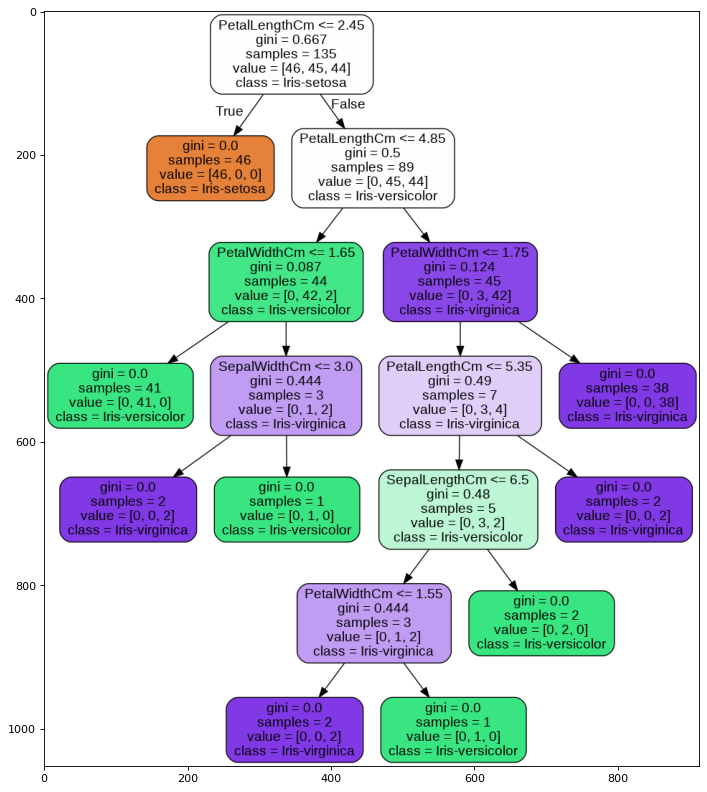

In [22]:
# display the visualization of the decision tree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "/content/iris_tree.dot.png"
image = mpimg.imread(image_path)
plt.figure(figsize=(1000/float(80), 1000/float(80)), dpi=80)
plt.imshow(image)
plt.show()